In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startup = pd.read_csv('/content/50_Startups.csv')
startup.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
stp=startup.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
stp.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#check for type of data
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADMS    50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check for null values
stp.isna().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

In [6]:
#check for correlation 
stp.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


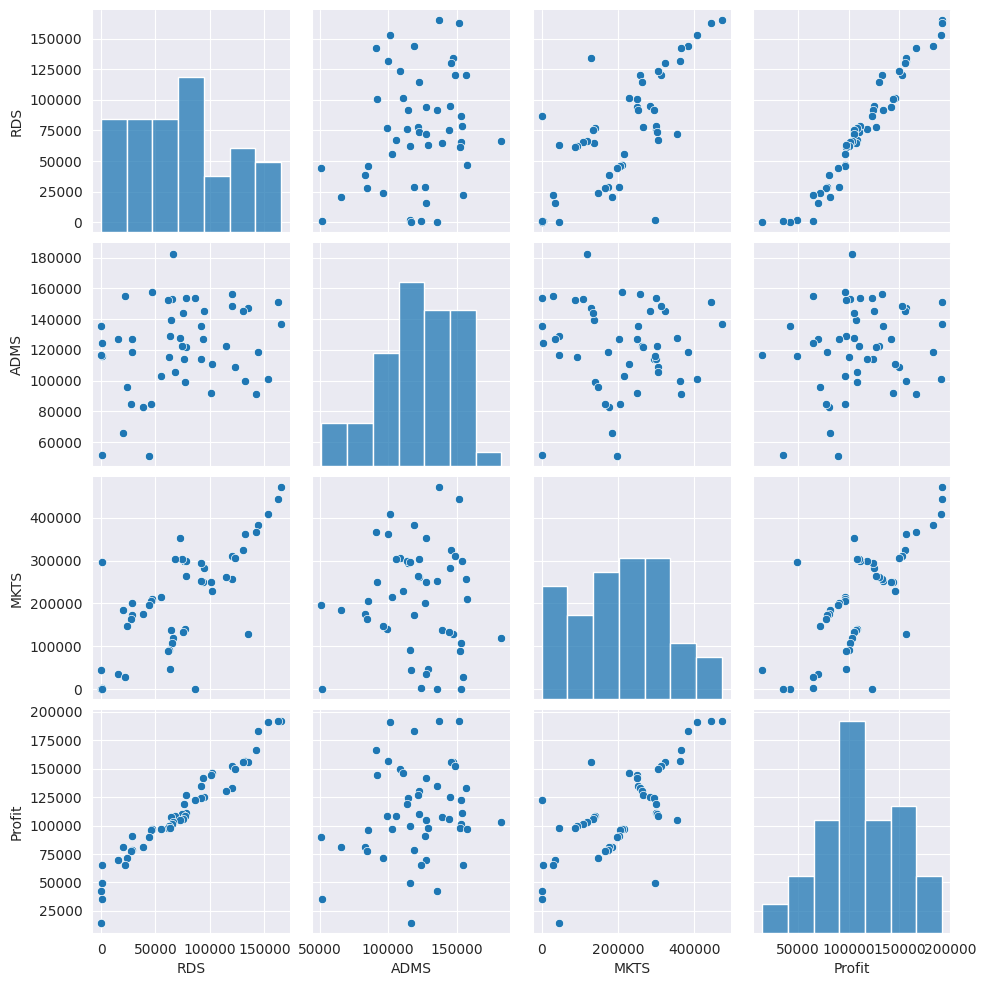

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(stp)

In [8]:
#Build the model
MDL=smf.ols('Profit~RDS+ADMS+MKTS',data=stp).fit()

In [9]:
MDL.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [10]:
#get tvalues and pvalues
print(MDL.tvalues,'\n',MDL.pvalues)

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [11]:
#check the rsquared vaule 
(MDL.rsquared,MDL.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
for i,column in enumerate(stp):
  MDL1=smf.ols(f'Profit~{column}',data=stp).fit()
  print(column)
  print('tvalues',MDL1.tvalues,'\n','pvalues',MDL1.pvalues)
  print('\n')

RDS
tvalues Intercept    19.320288
RDS          29.151139
dtype: float64 
 pvalues Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


ADMS
tvalues Intercept    3.040044
ADMS         1.419493
dtype: float64 
 pvalues Intercept    0.003824
ADMS         0.162217
dtype: float64


MKTS
tvalues Intercept    7.808356
MKTS         7.802657
dtype: float64 
 pvalues Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


State
tvalues Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 pvalues Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


Profit
tvalues Intercept    2.359296e+00
Profit       2.829853e+15
dtype: float64 
 pvalues Intercept    0.022426
Profit       0.000000
dtype: float64




In [14]:
from ssl import VERIFY_CRL_CHECK_LEAF
# check for the VIF
rsq_RDS = smf.ols('RDS~ADMS+MKTS',data=stp).fit().rsquared  
vif_RDS = 1/(1-rsq_RDS)

rsq_ADMS= smf.ols('ADMS~RDS+MKTS',data=stp).fit().rsquared  
vif_ADMS = 1/(1-rsq_ADMS) 

rsq_MKTS = smf.ols('MKTS~ADMS+RDS',data=stp).fit().rsquared  
vif_MKTS = 1/(1-rsq_MKTS) 
d1 = {'Variables':['RDS','ADMS','MKTS'],'VIF':[vif_RDS,vif_ADMS,vif_MKTS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


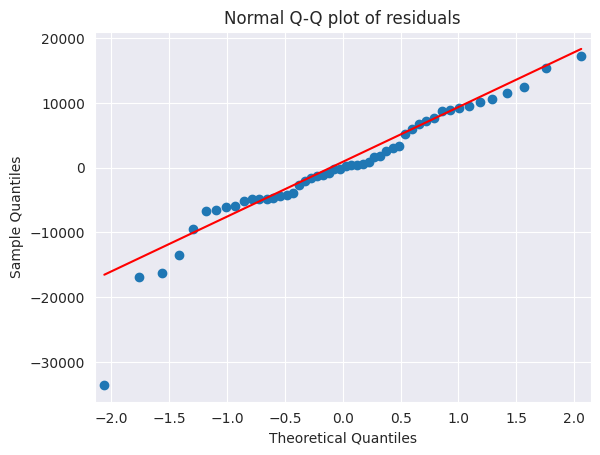

In [15]:
# draw QQplot
# line = 45 to draw the diagnoal line

import statsmodels.api as sm
sm.qqplot(MDL.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
def get_standerdized_values(vals):
  return(vals-vals.mean())/vals.std()

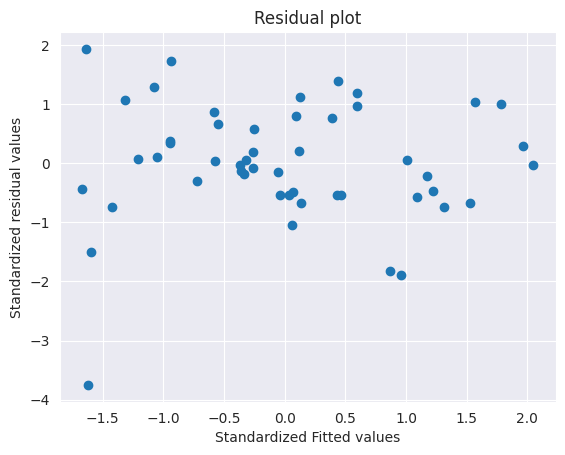

In [17]:
# draw residual plot

plt.scatter(get_standerdized_values(MDL.fittedvalues),
            get_standerdized_values(MDL.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


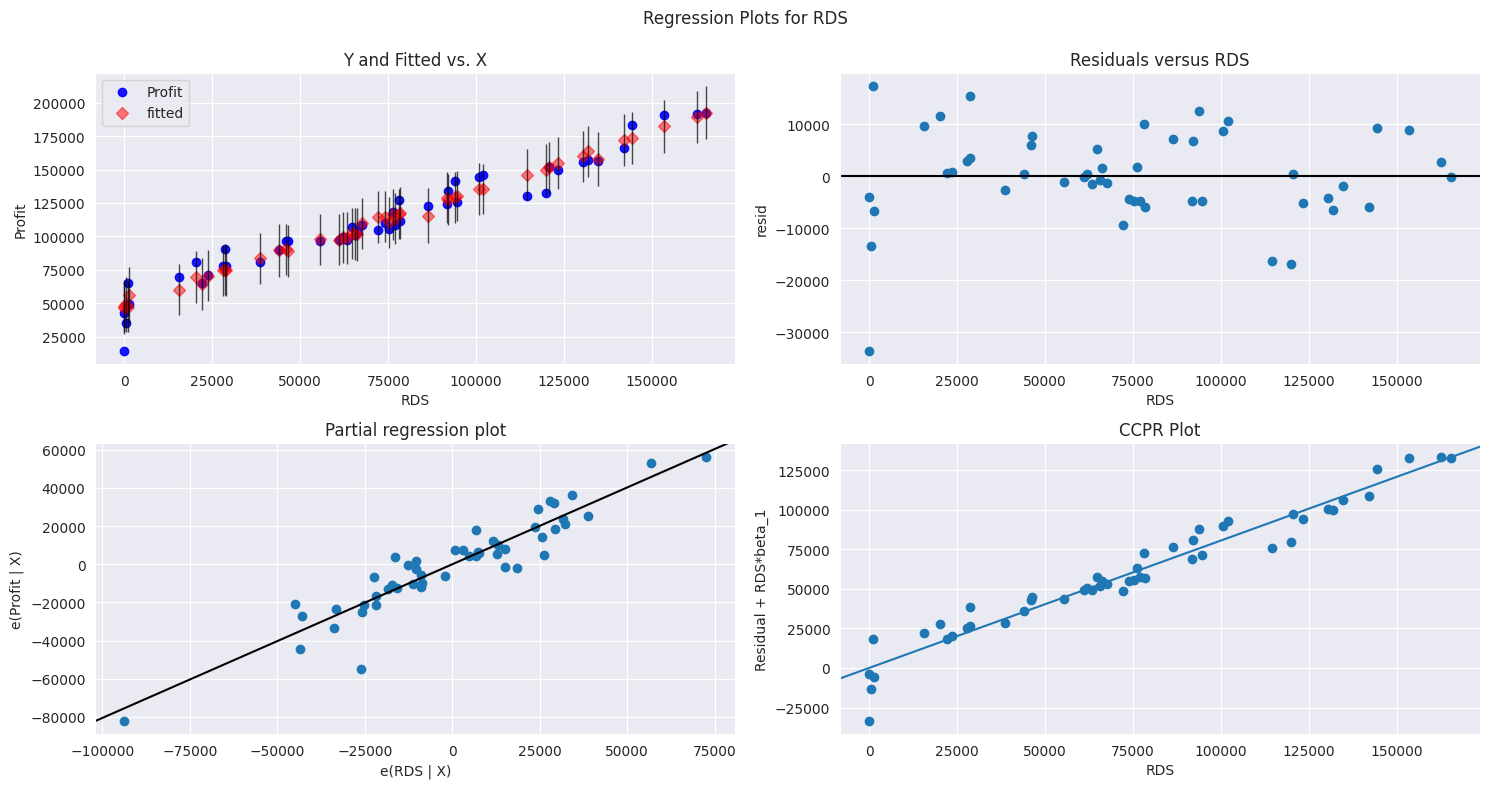

In [18]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(MDL,'RDS',fig=fig)
plt.show()

eval_env: 1


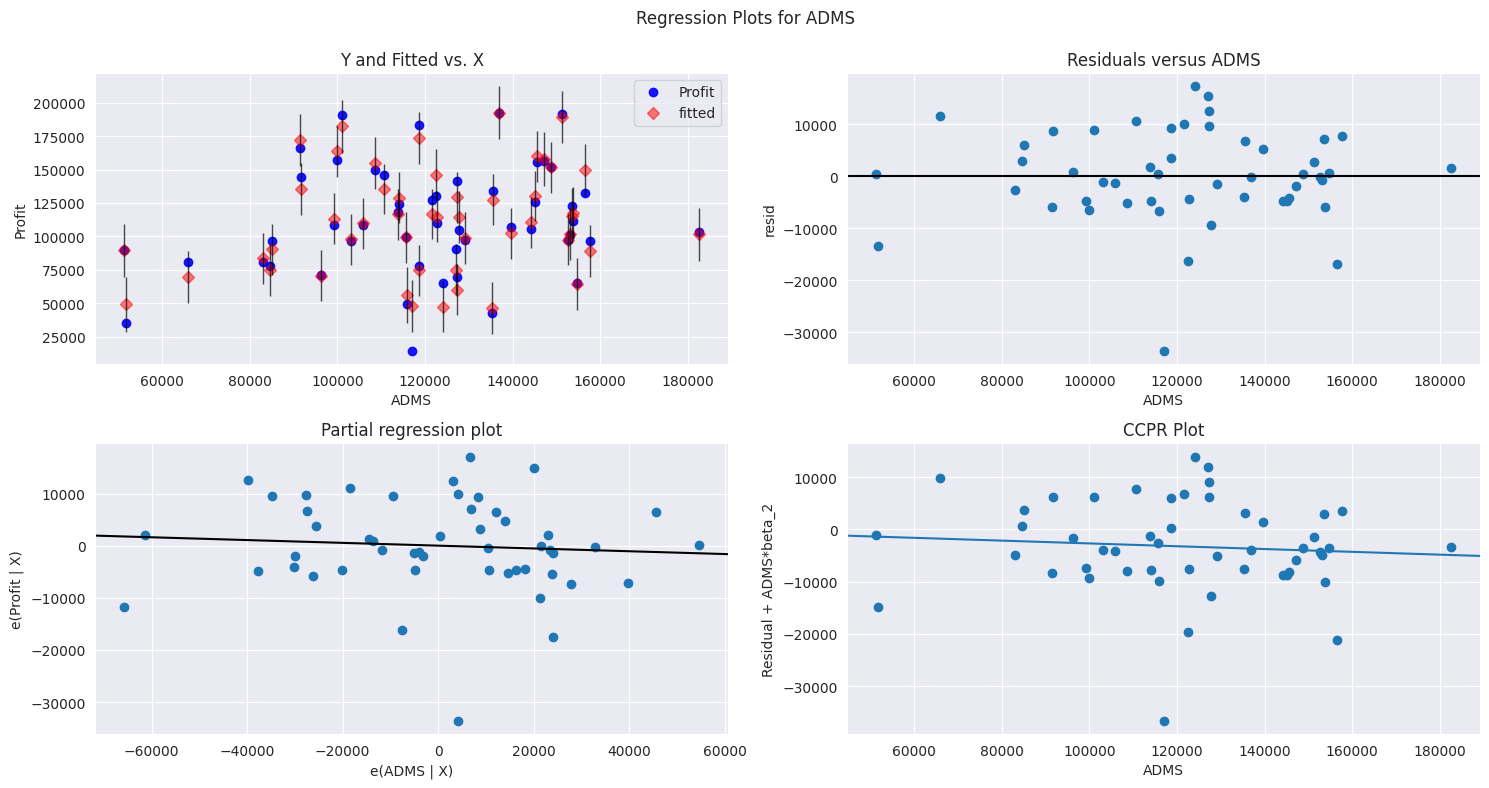

In [19]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(MDL,"ADMS",fig=fig)
plt.show()

eval_env: 1


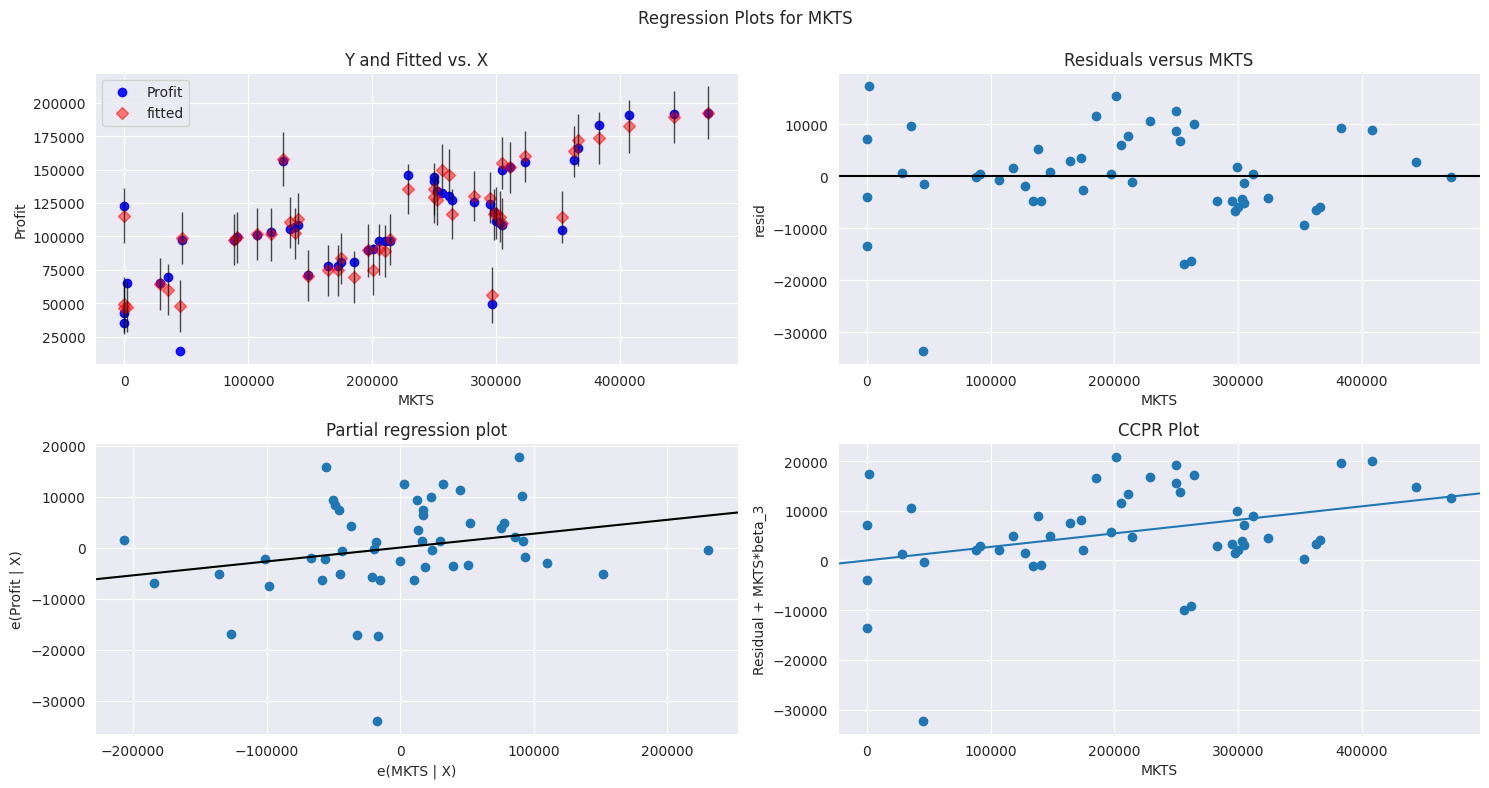

In [20]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(MDL,"MKTS",fig=fig)
plt.show()

In [21]:
# check the cooks distance

MDL_influence=MDL.get_influence()
(P,_)=MDL_influence.cooks_distance

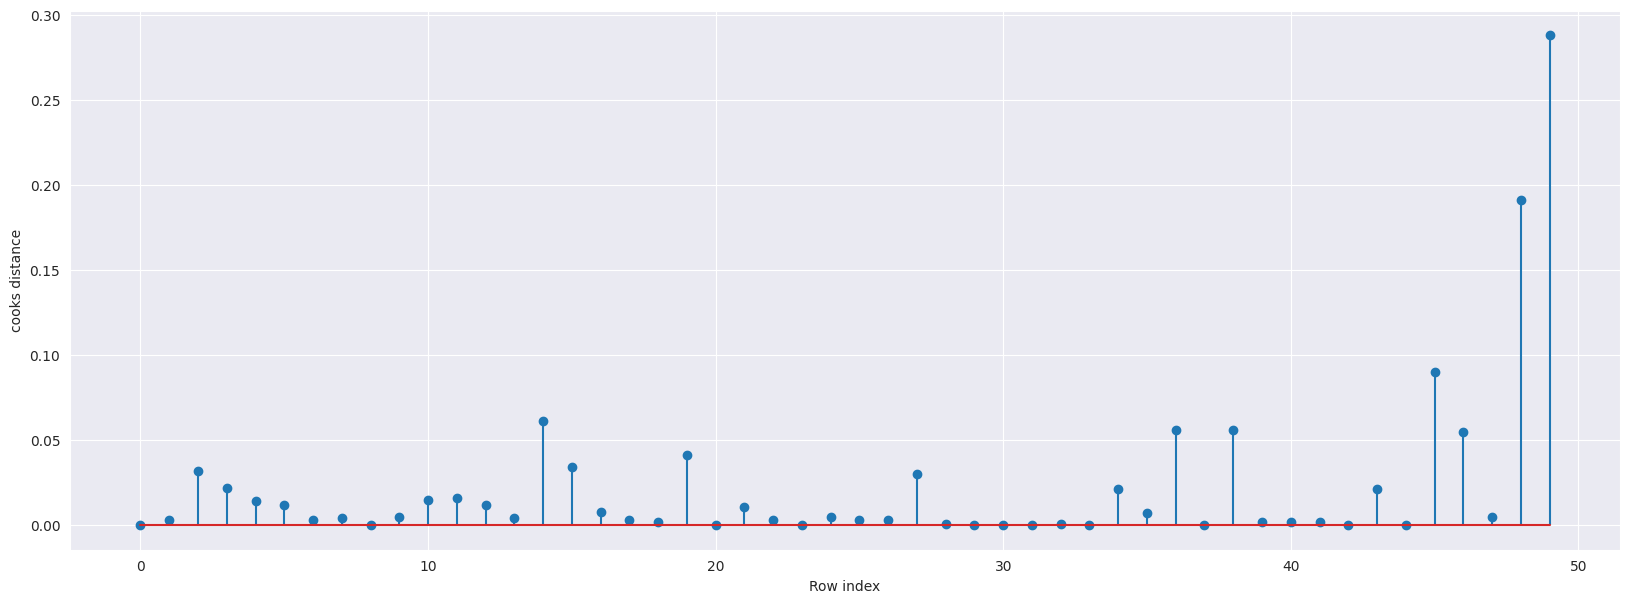

In [22]:
# Cooks Plot
# We want Cooks distance below '1'
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stp)),np.round(P,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [23]:
(np.argmax(P),np.max(P))

(49, 0.2880822927543272)

In [24]:
k=stp.shape[1]
n=stp.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.36

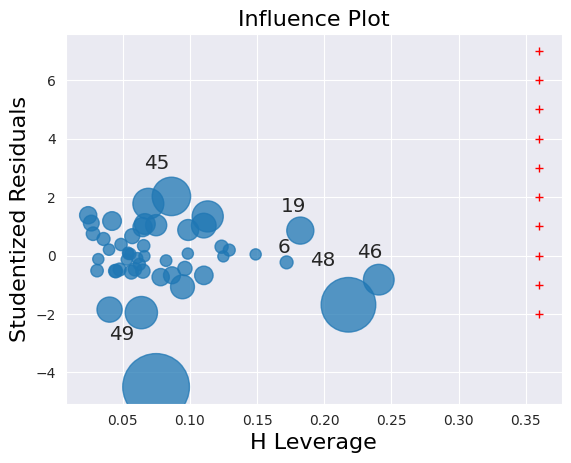

In [25]:
# Get the influencing values from influence plot
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(MDL,aplha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [26]:
(MDL.rsquared,MDL.aic,MDL.bic)

(0.9507459940683246, 1058.7714985998055, 1066.419590621518)